# BMI 500: Homework 11

Loyani Loyani, CSI PhD Student

Department of Biomedical Informatics, Emory University


Contact: loyani.loyani@emory.edu

## HW 1: SIR and SEIR Model Implementation for Pandemic Spread

**Objective**: Implement and analyze the susceptible-infectious-recovered (SIR) compartmental model to understand
the dynamics of infectious disease spread. Next, we expand the model to include an exposed compartment, incorporating
the effects of births and deaths. Finally, we evaluate how variations in parameters influence model outcomes
and discuss the implications for public health strategies.

**Part A**

Model Implementation: Writing a function in  Python
to implement the SIR model using a system of differential equations


In [ ]:
#import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint

import seaborn as sns

In [ ]:
#Function for the SIR model differential equations

def sir_model(y, t, N, beta, gamma):
    """
    Parameters:
    y: list containing current populations [S, I, R]
    t: time
    N: Total population (S + I + R)
    beta: transmission rate
    gamma: recovery rate

    Returns:
    List of derivatives [dS/dt, dI/dt, dR/dt]
    """
    S, I, R = y

    dSdt = -beta * S * I
    dIdt = beta * S * I - gamma * I
    dRdt = gamma * I

    return [dSdt, dIdt, dRdt]



**Part B**

SIR Model Simulation: Simulate the SIR model over a period of 150 days with the following initial conditions and parameters for a total population of N = 1000 individuals:


- Initial populations: S(0) = 999, I(0) = 1, R(0) = 0,
- Transmission rate: β = 0.3 × 10−3,
- Recovery rate: γ = 0.1.


In [ ]:
#Intitial conditions and parameters
N = 1000
I0 = 1
R0 = 0
S0 = N - I0 - R0

beta = 0.3e-3
gamma = 0.1

# Initial conditions
y0 = S0, I0, R0

# Time points (150 days)
t = np.linspace(0, 150, 151)

# Soln and transpose to separate S, I, R arrays
sol = odeint(sir_model, y0, t, args=(N, beta, gamma))
S, I, R = sol.T



Generating a plot showing the dynamics of S, I, and R over time



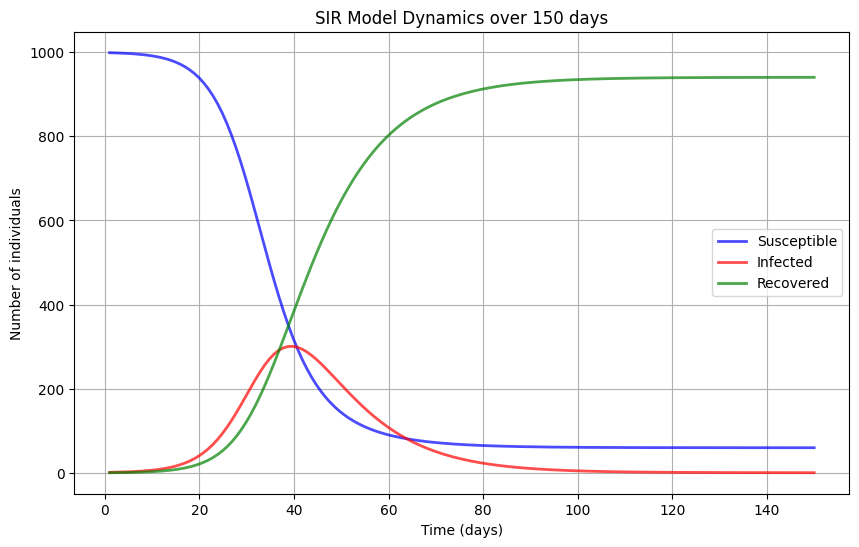

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
plt.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
plt.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
plt.xlabel('Time (days)')
plt.ylabel('Number of individuals')
plt.title('SIR Model Dynamics over 150 days')
plt.legend()
plt.grid(True)
plt.show()


**Part C**

Analysis and Interpretation: Analyze the results of your simulation, focusing on the following aspects:

**i. Infection peak:**

Identify the point in time where the number of infected individuals I(t) reaches its maximum
value. Discuss the factors contributing to this peak.

In [ ]:
# Infection peak
index_peak = np.argmax(I)
peak_time = t[index_peak]
infection_peak = np.max(I) #peak_Infection = I[index_peak]
peak_time = t[np.argmax(I)]


print(f"The maximum number of infected individuals is: {int(infection_peak)}")
print(f"Time of peak infection is {int(peak_time)} days")
print(f"The percentage of population infected at peak is: {(infection_peak/N)*100:.2f}%")

The maximum number of infected individuals is: 300
Time of peak infection is 38 days
The percentage of population infected at peak is: 30.06%


**Factors Contributing to this Peak**

- The initial rapid rise is driven by a large susceptible population (S) meaning each infected person infects more than one new person.

- The peak is reached when the infection rate (βSI) equals the recovery rate (γI). At this point, the susceptible population is sufficiently reduced, and the recovered population has grown enough to slow the spread, causing I(t) to stop increasing and begin its decline.

**ii. Basic reproductive number R0:**

Calculate and interpret the basic reproductive number R0 =
β
γ
. Explain
how R0 influences the overall dynamics of the pandemic, particularly in terms of infection spread and
control.

In [ ]:
#Unscaled basic reproductive number
R0 = beta / gamma
print(f"Basic Reproductive Number (R0) is: {R0}")

## Using the scaled R0 for population N
R0_scaled = beta * N / gamma
print(f"The scaled basic reproductive number for the total population N is {R0_scaled}. \nSince R0 = {R0_scaled:.4f} > 1, the infection will spread rapidly")

Basic Reproductive Number (R0) is: 0.0029999999999999996
The scaled basic reproductive number for the total population N is 2.9999999999999996. 
Since R0 = 3.0000 > 1, the infection will spread rapidly


**Interpretation**
- Since the basic reproductive number is greater than 1, tthe infection will spread rapidly with each infected person infecting approximately 3 others.

- A basic reproductive number R0 >1 (like ≈3.0) indicates that the number of infections will grow exponentially at the start of the epidemic. An R0 < 1 indicates the infection will die out. This value of R0≈3.0 is consistent with the simulated epidemic growth and peak observed in the plot.

**iii. Pandemic dynamics:**

Describe the general behavior of the S, I, and R populations over time. Discuss
how the interactions between these compartments represent the spread and eventual containment of the
infection.

- The S (Susceptible) population decreases monotonically as individuals move into the infected compartment upon contact. The rate of decrease is highest when both S and I are large.

- The I (Infected) population rises rapidly, reaches a peak, and then declines as individuals recover. This behavior shows the infection spreading through the population until a significant portion has gained immunity.

- The R (Recovered) population increases monotonically as infected individuals recover and gain immunity. The rate of increase is directly proportional to the size of the infected population.

- The process ends when I approaches zero, at which point the epidemic is considered contained. The interactions show a wave-like spread that terminates due to factors like herd immunity, achieved through a sufficiently large recovered (immune) population.

**Part D**

**SEIR Model with Births and Deaths**

We now expand the model to include exposed individuals and
account for births and deaths.

**i. Implementing the susceptible-exposed-infectious-recovered (SEIR) model** with the given differential equations:


In [ ]:
# SEIR model with births and deaths
def seir_model(y, t, beta, gamma, sigma, mu, N):
    """
    Parameters:
    y: list containing [S, E, I, R]
    t: time
    beta: transmission rate
    gamma: recovery rate
    sigma: rate of becoming infectious
    mu: birth/death rate
    N: total population  [S+E+I+R]

    Returns:
    List of derivatives [dS/dt, dE/dt, dI/dt, dR/dt]
    """
    S, E, I, R = y

    # Equations:
    dSdt = (mu * N) - (beta * S * I) - (mu * S)
    dEdt = (beta * S * I) - (sigma * E) - (mu * E)
    dIdt = (sigma * E) - (gamma * I) - (mu * I)
    dRdt = (gamma * I) - (mu * R)

    return [dSdt, dEdt, dIdt, dRdt]

**ii. Simulating the model** for both 365 and 1200 days with S(0) = 990, E(0) = 9, I(0) = 1, R(0) = 0, and parameters
β = 0.3 × 10−3, γ = 0.1, σ = 0.2, and μ = 0.01. Plot the compartment populations over time.

In [ ]:

#Initial conditions and parameters
N = 1000
S0_seir = 990
E0_seir = 9
I0_seir = 1
R0_seir = 0

beta_seir = 0.3e-3
gamma_seir = 0.1
sigma = 0.2
mu = 0.01

y0_seir = [S0_seir, E0_seir, I0_seir, R0_seir]

# Simulate for 365 days
t_365 = np.linspace(0, 365, 365)
solution_365 = odeint(seir_model, y0_seir, t_365, args=(beta_seir, gamma_seir, sigma, mu, N))
S_365, E_365, I_365, R_365 = solution_365.T

# Simulate for 1200 days
t_1200 = np.linspace(0, 1200, 1200)
solution_1200 = odeint(seir_model, y0_seir, t_1200, args=(beta_seir, gamma_seir, sigma, mu, N))
S_1200, E_1200, I_1200, R_1200 = solution_1200.T

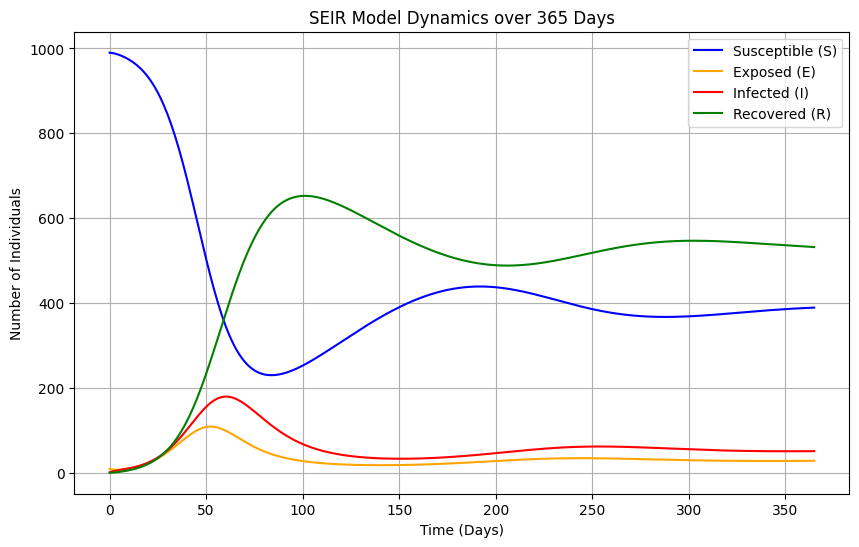

In [ ]:
# Plot 365 days
plt.figure(figsize=(10, 6))
plt.plot(t_365, S_365, label='Susceptible (S)', color='blue')
plt.plot(t_365, E_365, label='Exposed (E)', color='orange')
plt.plot(t_365, I_365, label='Infected (I)', color='red')
plt.plot(t_365, R_365, label='Recovered (R)', color='green')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Dynamics over 365 Days')
plt.legend()
plt.grid(True)
plt.show()


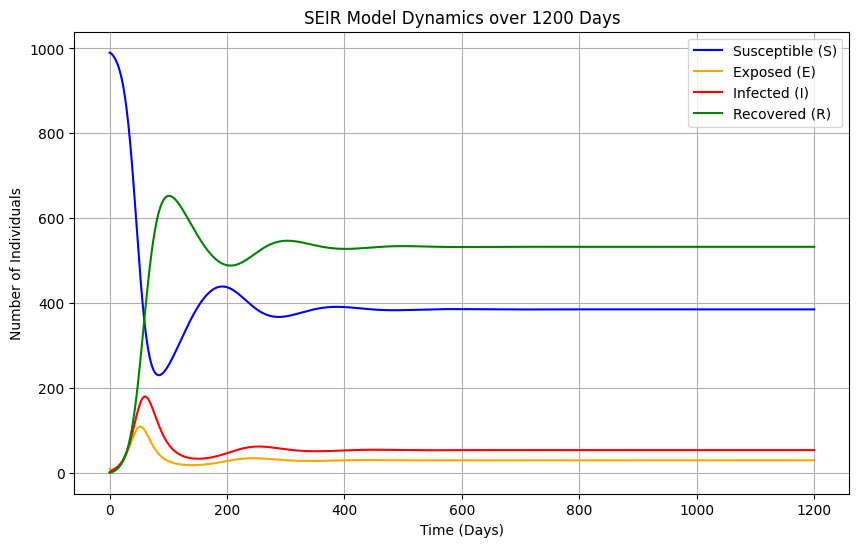

In [ ]:

# Plot 1200 days
plt.figure(figsize=(10, 6))
plt.plot(t_1200, S_1200, label='Susceptible (S)', color='blue')
plt.plot(t_1200, E_1200, label='Exposed (E)', color='orange')
plt.plot(t_1200, I_1200, label='Infected (I)', color='red')
plt.plot(t_1200, R_1200, label='Recovered (R)', color='green')
plt.xlabel('Time (Days)')
plt.ylabel('Number of Individuals')
plt.title('SEIR Model Dynamics over 1200 Days')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Infection peak over 365 days
index_peak365 = np.argmax(I_365)
peak_time365 = t[index_peak365]
infection_peak365 = np.max(I_365) #peak_Infection = I[index_peak]
#peak_time365 = t[np.argmax(I_365)]


print(f"The maximum number of infected individuals is: {int(infection_peak365)}")
print(f"Time of peak infection is {int(peak_time365)} days")
print(f"The percentage of population infected at peak is: {(infection_peak365/N)*100:.2f}%")

The maximum number of infected individuals is: 179
Time of peak infection is 60 days
The percentage of population infected at peak is: 17.95%


In [ ]:
# Infection peak ver 1200 days
index_peak1200 = np.argmax(I_1200)
peak_time1200 = t[index_peak1200]
infection_peak1200 = np.max(I_1200) #peak_Infection = I[index_peak]
peak_time = t[np.argmax(I_1200)]


print(f"The maximum number of infected individuals is: {int(infection_peak1200)}")
print(f"Time of peak infection is {int(peak_time)} days")
print(f"The percentage of population infected at peak is: {(infection_peak1200/N)*100:.2f}%")

The maximum number of infected individuals is: 179
Time of peak infection is 60 days
The percentage of population infected at peak is: 17.94%


**iii. Discuss the pattern observed** in the number of infections in terms of waves of the pandemic.


The SEIR model dynamics over 1200 days clearly show a pattern of damped oscillations in the Infected (I) population. This pattern represents waves of the pandemic.

- The initial peak around Day 60 is the largest, this is the first wave of the pandemic. It occurs because the entire population is initially susceptible, allowing the infection to spread rapidly until a significant portion of the population is recovered (R), achieving a temporary form of herd immunity.

- After the first wave, the number of infected individuals drops dramatically. However, the I population does not drop to zero. Instead, the infection resurges in smaller, less intense waves.

- Over the long term (visible in the 1200-day plot), the amplitude of these waves decreases and eventually the system settles into a stable endemic state after roughly 600 days. In this state, the S, E, I, and R populations stabilize at constant, non-zero levels (e.g., I stabilizes around 50 individuals). This means the infection persists indefinitely within the population, maintained by a balance between new infections and deaths.

**iv. Discuss the effect of the exposed compartment** and birth/death rates on the pandemic dynamics.

**Effects of Exposed Compartment (E)**

The exposed (E) compartment introduces a time delay into the spread. Individuals must first move from S (Susceptible) to E (exposed) and then from E (exposed) to I (infected) at rate σ. This latency period causes the peak of the Infected (I) curve to lag behind the peak of the Exposed (E) curve.


**Birth/Death Rates (μ)**
- Births continuously introduce new susceptible individuals into the population, acting as a "fuel" for the pandemic and enabling the oscillatory waves and endemic steady state observed. Without births, the infection would eventually die out (like in the standard SIR model) or persist in a stable, low endemic state.

- Deaths balance the population, keeping the total population N constant in the long run. They also contribute to the removal of individuals from all compartments, including the immune (R) compartment, which can also contribute to sustaining the infection.


**E. Sensitivity Analysis:**

Next, let’s assess how variations in parameters impact model outcomes and implications
for public health.

**i. Conduct a sensitivity analysis on the SEIR model** from the previous part by varying β (0.1 × 10−3 to
0.5 × 10−3) and γ (0.05 to 0.2).

In [36]:

# Range of parameters to test
betas = np.linspace(0.1e-3, 0.5e-3, 5)
gammas = np.linspace(0.05, 0.2, 4)

# Fixed parameters
N = 1000
S0, E0, I0, R0 = 990, 9, 1, 0
y0_seir = [S0, E0, I0, R0]
sigma_seir = 0.2
mu_seir = 0.01
t_analysis = np.linspace(0, 365, 365)

# Storage for results
peak_infections = np.zeros((len(betas), len(gammas)))
total_infections = np.zeros((len(betas), len(gammas)))

# Run simulations for all combinations
for i, beta_val in enumerate(betas):
    for j, gamma_val in enumerate(gammas):
        # Solve the SEIR model for 365 days
        ret = odeint(seir_model, y0_seir, t_analysis, args=(N, beta_val, sigma_seir, gamma_val, mu_seir))
        S, E, I, R = ret.T


        # Peak Infection
        peak_infections[i, j] = np.max(I)

        # Total Infections,the number of people who have ever been infected.
        total_incident_cases = S[0] - S[-1] + mu_seir * np.trapz(S, t_analysis)

        # A simpler measure is the cumulative recovered population at the end of the year:
        total_infections[i, j] = R[-1] + I[-1] + E[-1] # Approximation: R(T) + I(T) + E(T) after the first wave's peak.


/tmp/ipython-input-2182709331.py:29: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_incident_cases = S[0] - S[-1] + mu_seir * np.trapz(S, t_analysis)


**ii. Plot the peak infection and total infections** over a year for each β and γ combination.

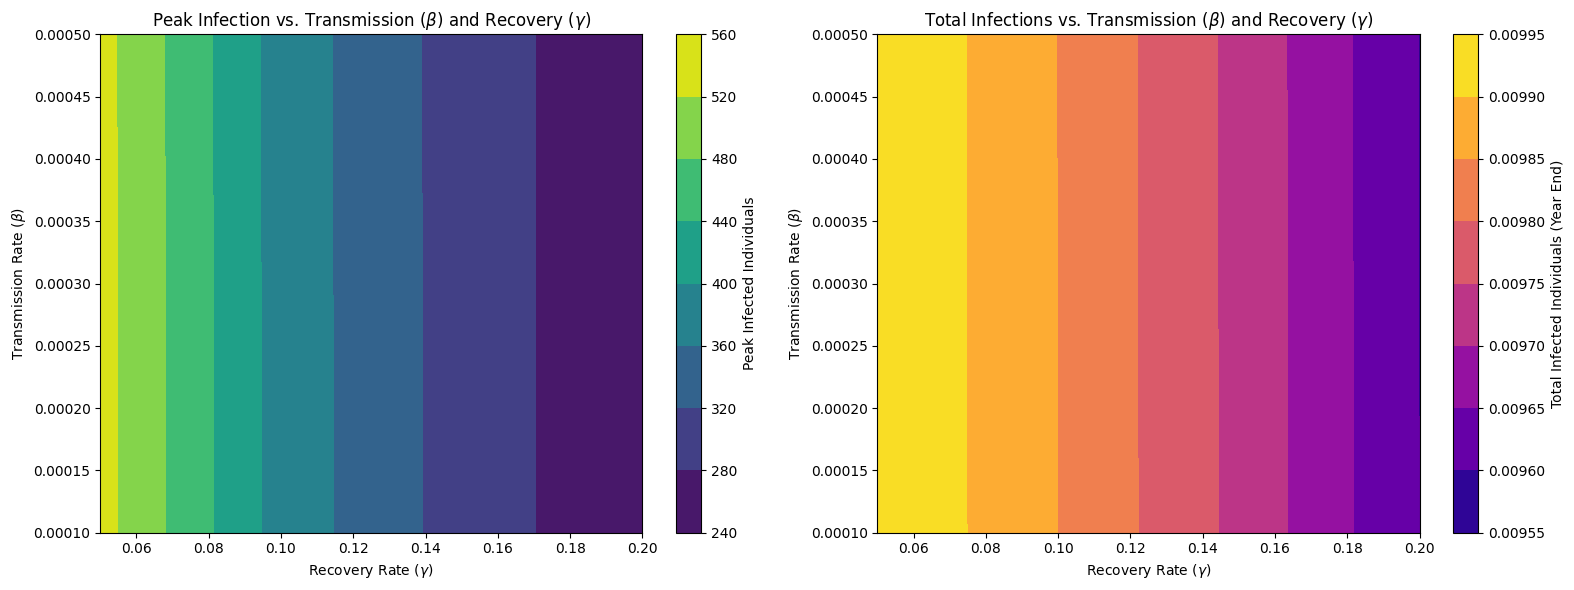

In [37]:

# Convert to meshgrid for contour plotting
BETA, GAMMA = np.meshgrid(gammas, betas)

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Peak Infection Plot [cite: 41]
contour_peak = axes[0].contourf(BETA, GAMMA, peak_infections, cmap='viridis')
fig.colorbar(contour_peak, ax=axes[0], label='Peak Infected Individuals')
axes[0].set_title('Peak Infection vs. Transmission ($\u03B2$) and Recovery ($\u03B3$)')
axes[0].set_xlabel('Recovery Rate ($\u03B3$)')
axes[0].set_ylabel('Transmission Rate ($\u03B2$)')

# Total Infections Plot (Cumulative Recovered + Current Infected + Exposed at T=365)
contour_total = axes[1].contourf(BETA, GAMMA, total_infections, cmap='plasma')
fig.colorbar(contour_total, ax=axes[1], label='Total Infected Individuals (Year End)')
axes[1].set_title('Total Infections vs. Transmission ($\u03B2$) and Recovery ($\u03B3$)')
axes[1].set_xlabel('Recovery Rate ($\u03B3$)')
axes[1].set_ylabel('Transmission Rate ($\u03B2$)')

plt.tight_layout()
plt.show()

**iii. Discuss the implications for public health interventions**, relating β to social distancing and γ to medical
treatments.

- Interventions that reduce the transmission rate (like social distancing and non-pharmaceutical interventions) are generally the most powerful tool for public health officials to mitigate both the severity (peak) and extent (total cases) of an outbreak.

- While reducing β is for prevention, increasing γ (e.g., through effective medical treatments) is crucial for patient outcomes and also helps dampen the epidemic spread. A low γ means a longer infectious period, exacerbating the problem.